<a href="https://colab.research.google.com/github/GoMinh/GoMinh/blob/main/Causal_Hazards_Part1_(Regression_DML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dowhy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.4/174.4 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.2 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.4
    Uninstalling Cython-3.0.4:
      Successfully uninstalled Cython-3.0.4


In [ ]:
import dowhy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Causal graph (general)

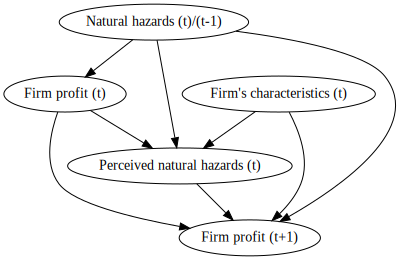

In [ ]:
import graphviz as gr
graph = gr.Digraph()

graph.edge("Perceived natural hazards (t)", "Firm profit (t+1)")
graph.edge("Natural hazards (t)/(t-1)", "Perceived natural hazards (t)")
graph.edge("Natural hazards (t)/(t-1)", "Firm profit (t+1)")
graph.edge("Natural hazards (t)/(t-1)", "Firm profit (t)")
graph.edge("Firm profit (t)", "Firm profit (t+1)")
graph.edge("Firm profit (t)", "Perceived natural hazards (t)")
graph.edge("Firm's characteristics (t)", "Firm profit (t+1)")
graph.edge("Firm's characteristics (t)", "Perceived natural hazards (t)")

graph

#Data

In [ ]:
# Upload "df101.csv"
from google.colab import files
uploaded = files.upload()

Saving df101.csv to df101.csv


In [ ]:
df = pd.read_csv("df101.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148910 entries, 0 to 148909
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   148910 non-null  int64  
 1   roa1         148910 non-null  float64
 2   roa          148910 non-null  float64
 3   hazardlag1   148910 non-null  float64
 4   hazard       148910 non-null  float64
 5   disaster10K  148910 non-null  int64  
 6   gvkey2       148910 non-null  int64  
 7   lctat        148910 non-null  float64
 8   cheat        148910 non-null  float64
 9   chlct        148910 non-null  float64
 10  lctlt        148910 non-null  float64
 11  logat        148910 non-null  float64
 12  saleat       148910 non-null  float64
 13  reat         148910 non-null  float64
 14  relct        148910 non-null  float64
 15  dtat         148910 non-null  float64
 16  seqat        148910 non-null  float64
 17  invtsale     148910 non-null  float64
 18  xintsale     148910 non-

In [ ]:
df.describe()

,Unnamed: 0,roa1,roa,hazardlag1,hazard,disaster10K,gvkey2,lctat,cheat,chlct,lctlt,logat,saleat,reat,relct,dtat,seqat,invtsale,xintsale,hhi
count,148910.00000,148910.000000,148910.000000,1.489100e+05,1.489100e+05,148910.000000,148910.000000,148910.000000,148910.000000,148910.000000,148910.000000,148910.000000,148910.000000,148910.000000,148910.000000,148910.000000,148910.000000,148910.000000,148910.000000,148910.000000
mean,74454.50000,-0.204117,-0.221807,1.958244e-04,1.944818e-04,3.350044,47388.337768,0.421449,0.195078,0.960476,0.565079,5.153057,1.145256,-2.196206,-4.196812,0.255531,0.282031,0.307992,0.640685,0.081283
std,42986.75863,2.368722,2.777227,3.750617e-03,3.752619e-03,10.857449,55941.941416,3.593689,0.495567,4.113808,0.301186,2.514413,3.422263,23.516532,60.686702,1.221744,3.633191,23.305067,31.779161,0.080533
min,0.00000,-312.118852,-334.051122,0.000000e+00,0.000000e+00,0.000000,1004.000000,0.000000,-0.135135,-0.268207,0.000000,-2.302585,0.000000,-3427.335878,-20677.500000,0.000000,-691.206349,0.000000,-1.162791,0.008902
25%,37227.25000,-0.097960,-0.106048,1.788778e-07,1.883206e-07,0.000000,9366.000000,0.116765,0.021363,0.070540,0.299805,3.398569,0.440475,-0.565288,-2.610218,0.000000,0.230235,0.007344,0.003534,0.041390
50%,74454.50000,0.018964,0.019792,2.138515e-06,2.096723e-06,0.000000,23355.000000,0.197766,0.081004,0.284855,0.548235,5.151955,0.862105,0.004597,0.000000,0.102523,0.405945,0.073601,0.014594,0.057497
75%,111681.75000,0.063685,0.065153,1.973345e-05,1.929512e-05,3.000000,63768.000000,0.326662,0.237307,0.854475,0.856679,6.928547,1.428007,0.217201,1.163762,0.305341,0.611322,0.156687,0.042972,0.090528
max,148909.00000,127.429787,400.535211,5.963970e-01,5.963970e-01,743.000000,347007.000000,691.063492,110.336427,788.500000,2.233333,13.220704,733.222738,6.952877,324.398658,256.812766,61.371841,8175.416667,5589.000000,1.000000


**Create a new binary treatment based on disaster10K**

In [ ]:
# check
df['disaster10K'].mean()

3.350043650527164

In [ ]:
df['treatment'] =  (df.disaster10K >= 4).astype(int)
df.head(30)

,Unnamed: 0,roa1,roa,hazardlag1,hazard,disaster10K,gvkey2,lctat,cheat,chlct,...,logat,saleat,reat,relct,dtat,seqat,invtsale,xintsale,hhi,treatment
0,0,0.026647,0.066032,1.945494e-05,1.945494e-05,0,1004,0.238563,0.010643,0.044614,...,5.962347,1.170853,0.245940,1.030923,0.255157,0.498866,0.347555,0.021411,0.056279,0
1,1,0.066032,0.038954,1.945494e-05,1.945494e-05,0,1004,0.200397,0.003928,0.019602,...,5.940061,1.180070,0.252467,1.259836,0.255157,0.490142,0.369408,0.023833,0.023798,0
2,2,0.038954,0.025345,1.945494e-05,1.945494e-05,0,1004,0.252747,0.011494,0.024379,...,5.979774,1.157486,0.281182,1.112503,0.255157,0.538783,0.452947,0.021830,0.024233,0
3,3,0.025345,0.000775,1.945494e-05,1.945494e-05,0,1004,0.171534,0.005400,0.031478,...,5.900311,0.916562,0.228264,1.330723,0.255157,0.453075,0.423137,0.019882,0.023074,0
4,4,0.000775,0.022733,1.945494e-05,1.945494e-05,0,1004,0.159022,0.042446,0.266917,...,6.034586,0.957587,0.224354,1.410831,0.255157,0.445002,0.387510,0.021188,0.023278,0
5,5,0.022733,0.024572,1.945494e-05,1.945494e-05,0,1004,0.167045,0.051358,0.307451,...,6.054003,1.030945,0.233954,1.400547,0.255157,0.450202,0.337290,0.021585,0.024754,0
6,6,0.024572,0.036570,6.528260e-06,1.945494e-05,0,1004,0.149901,0.063457,0.423329,...,6.081867,0.953560,0.206843,1.379870,0.255157,0.386407,0.297091,0.018014,0.023022,0
7,7,0.036570,0.043478,4.128121e-07,6.528260e-06,0,1004,0.149101,0.077107,0.517148,...,6.272092,0.878861,0.182946,1.226993,0.255157,0.401544,0.277756,0.013791,0.024010,0
8,8,0.043478,0.053175,1.734931e-06,4.128121e-07,0,1004,0.205260,0.023701,0.115469,...,6.508112,1.076370,0.203116,0.989554,0.255157,0.414035,0.286944,0.015788,0.026513,0
9,9,0.053175,0.057348,3.991204e-06,1.734931e-06,0,1004,0.234260,0.011134,0.047527,...,6.588417,1.238918,0.240763,1.027761,0.244750,0.439994,0.297266,0.018126,0.033179,0


In [ ]:
# Exclude extreme values (outcome, treatment and key confounders)

df1 = df[df['roa1'] >= -20]
df2 = df1[df['roa1'] <= 20]
df2_temp1 = df2[df['roa'] >= -20]
df2_temp2 = df2_temp1[df['roa'] <= 20]
df3 = df2_temp2[df['hazard'] <= 0.5]
df3_temp = df3[df['hazardlag1'] <= 0.5]
df4 = df3_temp[df['disaster10K'] <= 300]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148603 entries, 0 to 148909
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   148603 non-null  int64  
 1   roa1         148603 non-null  float64
 2   roa          148603 non-null  float64
 3   hazardlag1   148603 non-null  float64
 4   hazard       148603 non-null  float64
 5   disaster10K  148603 non-null  int64  
 6   gvkey2       148603 non-null  int64  
 7   lctat        148603 non-null  float64
 8   cheat        148603 non-null  float64
 9   chlct        148603 non-null  float64
 10  lctlt        148603 non-null  float64
 11  logat        148603 non-null  float64
 12  saleat       148603 non-null  float64
 13  reat         148603 non-null  float64
 14  relct        148603 non-null  float64
 15  dtat         148603 non-null  float64
 16  seqat        148603 non-null  float64
 17  invtsale     148603 non-null  float64
 18  xintsale     148603 non-

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.


**Number of firms**

In [ ]:
# Number of firms
GVKEY_set = set(df4['gvkey2'])
print(len(GVKEY_set))

14994


**Save data for meta-learners**

In [ ]:
# save
df4.to_csv("df102.csv")

In [ ]:
df4.describe()

,Unnamed: 0,roa1,roa,hazardlag1,hazard,disaster10K,gvkey2,lctat,cheat,chlct,...,logat,saleat,reat,relct,dtat,seqat,invtsale,xintsale,hhi,treatment
count,148603.000000,148603.000000,148603.000000,1.486030e+05,1.486030e+05,148603.000000,148603.000000,148603.000000,148603.000000,148603.000000,...,148603.000000,148603.000000,148603.000000,148603.000000,148603.000000,148603.000000,148603.000000,148603.000000,148603.000000,148603.000000
mean,74402.225534,-0.154623,-0.168287,1.916504e-04,1.904332e-04,3.281145,47317.780341,0.383345,0.194389,0.961773,...,5.163710,1.143941,-1.954162,-3.995807,0.251610,0.321688,0.306228,0.533575,0.081304,0.232458
std,42977.950443,0.854590,0.909651,3.419011e-03,3.421968e-03,9.211120,55902.447377,2.353004,0.486248,4.116597,...,2.502587,3.420964,19.297601,27.672896,1.181509,2.277671,23.327532,28.461294,0.080523,0.422401
min,0.000000,-19.955414,-19.955414,0.000000e+00,0.000000e+00,0.000000,1004.000000,0.000000,-0.135135,-0.268207,...,-2.302585,0.000000,-3363.601351,-3862.658228,0.000000,-558.962733,0.000000,-1.162791,0.008902,0.000000
25%,37186.500000,-0.096629,-0.104484,1.816432e-07,1.908460e-07,0.000000,9358.000000,0.116668,0.021379,0.071092,...,3.408818,0.441264,-0.557887,-2.584747,0.000000,0.231387,0.007412,0.003525,0.041431,0.000000
50%,74386.000000,0.019119,0.019959,2.155572e-06,2.108396e-06,0.000000,23275.000000,0.197522,0.080991,0.285911,...,5.156898,0.862462,0.005473,0.000000,0.102583,0.406473,0.073663,0.014549,0.057566,0.000000
75%,111599.500000,0.063795,0.065238,1.983143e-05,1.936066e-05,3.000000,63755.000000,0.325806,0.237203,0.855833,...,6.931717,1.427767,0.217755,1.166262,0.304999,0.611648,0.156695,0.042778,0.090528,0.000000
max,148909.000000,15.778326,14.196858,4.977105e-01,4.977105e-01,282.000000,347007.000000,518.192547,110.336427,788.500000,...,13.220704,733.222738,6.952877,324.398658,256.812766,61.371841,8175.416667,5589.000000,1.000000,1.000000


#Exploratory Data Analysis (EDA)

Text(0, 0.5, 'roa1')

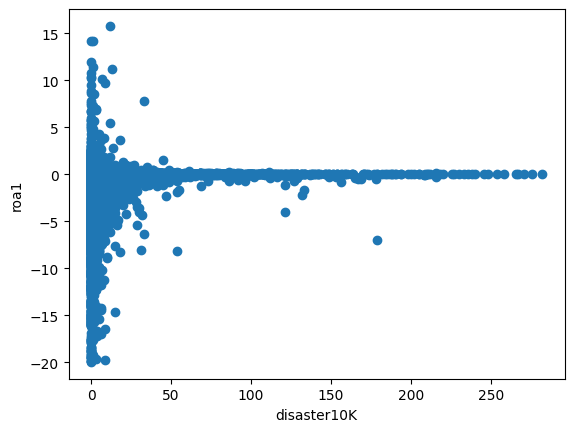

In [ ]:
# disaster10K and roa1
plt.scatter(df4['disaster10K'], df4['roa1'])
plt.xlabel('disaster10K')
plt.ylabel('roa1')

Text(0, 0.5, 'roa1')

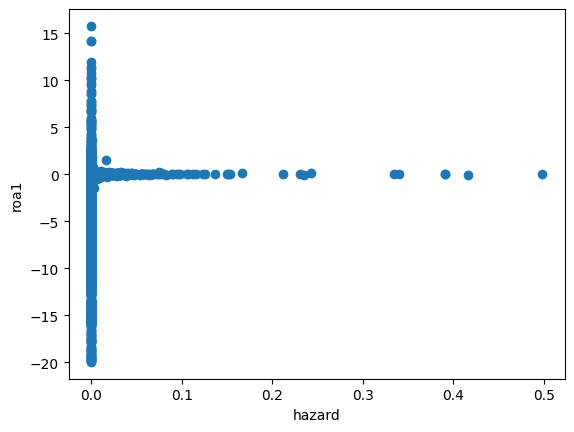

In [ ]:
# hazard and roa1
plt.scatter(df4['hazard'], df4['roa1'])
plt.xlabel('hazard')
plt.ylabel('roa1')

Text(0, 0.5, 'roa1')

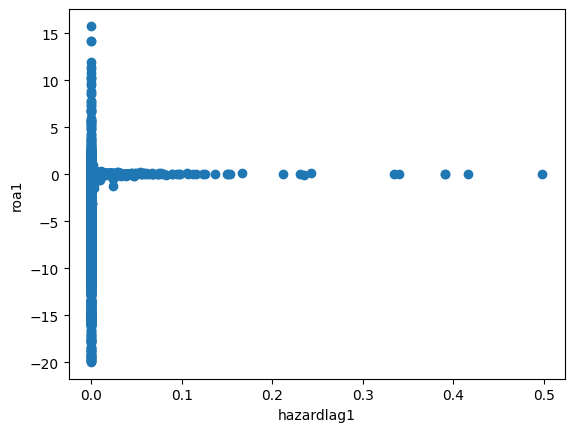

In [ ]:
# hazardlag1 and roa1
plt.scatter(df4['hazardlag1'], df4['roa1'])
plt.xlabel('hazardlag1')
plt.ylabel('roa1')

#Part 1: Linear regression + Numerical treatment

###STEP 1: Causal graph

In [ ]:
# # MODEL 1
# g = """digraph {
# disaster10K;
# roa1;
# hazard;
# hazardlag1;
# hazard -> disaster10K; hazard -> roa1;
# hazardlag1 -> disaster10K; hazardlag1 -> roa1;
# disaster10K -> roa1;
# }"""

In [ ]:
# # MODEL 2
# g = """digraph {
# disaster10K;
# roa1;
# hazard;
# hazardlag1;
# roa;
# cheat;
# chlct;
# seqat;
# logat;
# hhi;

# hazard -> disaster10K; hazard -> roa1;
# hazardlag1 -> disaster10K; hazardlag1 -> roa1;

# roa -> roa1;
# roa -> disaster10K;
# cheat -> roa1;
# cheat -> disaster10K;
# chlct -> roa1;
# chlct -> disaster10K;
# seqat -> roa1;
# seqat -> disaster10K;
# logat -> roa1;
# logat -> disaster10K;
# hhi -> roa1;
# hhi -> disaster10K;

# disaster10K -> roa1;
# }"""

In [ ]:
# # MODEL 3
# g = """digraph {
# disaster10K;
# roa1;
# hazard;
# hazardlag1;
# roa;
# cheat;
# chlct;
# invtsale;
# xintsale;
# seqat;
# logat;
# hhi;

# hazard -> disaster10K; hazard -> roa1;
# hazardlag1 -> disaster10K; hazardlag1 -> roa1;

# roa -> roa1;
# roa -> disaster10K;
# cheat -> roa1;
# cheat -> disaster10K;
# chlct -> roa1;
# chlct -> disaster10K;
# invtsale -> roa1;
# invtsale -> disaster10K;
# xintsale -> roa1;
# xintsale -> disaster10K;
# seqat -> roa1;
# seqat -> disaster10K;
# logat -> roa1;
# logat -> disaster10K;
# hhi -> roa1;
# hhi -> disaster10K;

# disaster10K -> roa1;
# }"""

In [ ]:
# MODEL 4
g = """digraph {
disaster10K;
roa1;
hazard;
hazardlag1;
roa;
dtat;
lctat;
cheat;
chlct;
invtsale;
xintsale;
seqat;
lctlt;
logat;
hhi;

hazard -> disaster10K; hazard -> roa1;
hazardlag1 -> disaster10K; hazardlag1 -> roa1;

roa -> roa1;
roa -> disaster10K;
dtat -> roa1;
dtat -> disaster10K;
lctat -> roa1;
lctat -> disaster10K;
cheat -> roa1;
cheat -> disaster10K;
chlct -> roa1;
chlct -> disaster10K;
invtsale -> roa1;
invtsale -> disaster10K;
xintsale -> roa1;
xintsale -> disaster10K;
seqat -> roa1;
seqat -> disaster10K;
lctlt -> roa1;
lctlt -> disaster10K;
logat -> roa1;
logat -> disaster10K;
hhi -> roa1;
hhi -> disaster10K;

disaster10K -> roa1;
}"""

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


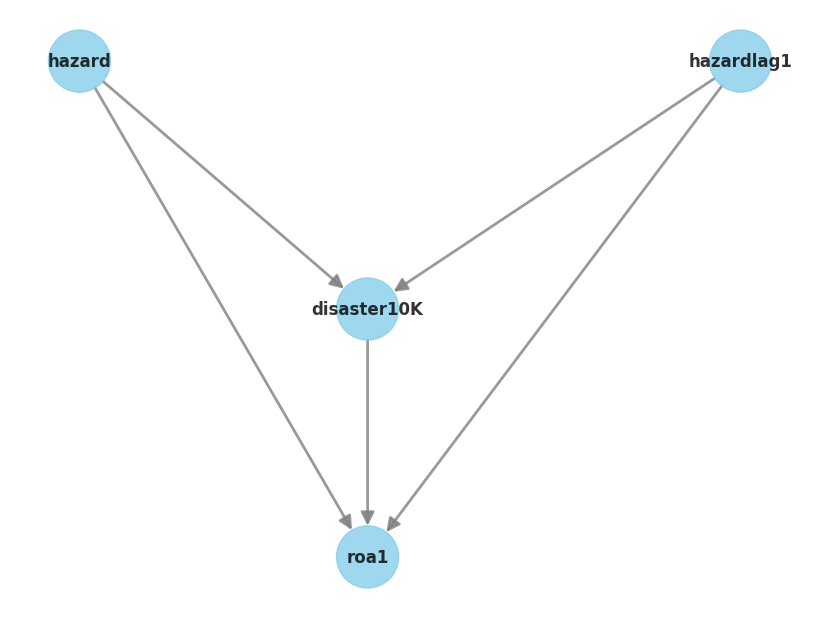

In [ ]:
# causal graph
from dowhy import CausalModel

treatment = 'disaster10K'
outcome = 'roa1'
model = CausalModel(
    data = df4,
    treatment = treatment,
    outcome = outcome,
    graph = g)

model.view_model()

###STEP 2: Identify

In [ ]:
# Step 2: IDENTIFY effect (using identify_effect function and backdoor estimator)
# Identify 'estimand'
est_identify = model.identify_effect(proceed_when_unidentifiable=True, method_name='exhaustive-search')

print(est_identify)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                  
──────────────(E[roa1|hazard,hazardlag1])
d[disaster10K]                           
Estimand assumption 1, Unconfoundedness: If U→{disaster10K} and U→roa1 then P(roa1|disaster10K,hazard,hazardlag1,U) = P(roa1|disaster10K,hazard,hazardlag1)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



###STEP 3: Estimate

**Method 1: Linear Regression**

In [ ]:
est_linreg = model.estimate_effect(est_identify, method_name='backdoor.linear_regression', test_significance=True, target_units='ate') #default: target_units='ate'
print(est_linreg)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                  
──────────────(E[roa1|hazard,hazardlag1])
d[disaster10K]                           
Estimand assumption 1, Unconfoundedness: If U→{disaster10K} and U→roa1 then P(roa1|disaster10K,hazard,hazardlag1,U) = P(roa1|disaster10K,hazard,hazardlag1)

## Realized estimand
b: roa1~disaster10K+hazard+hazardlag1
Target units: ate

## Estimate
Mean value: 0.003600469476373963
p-value: [2.44955342e-50]



###STEP 4: Refute tests (for linear regressions)

**(1st method) COMMON CAUSE REFUTER (generate a random confounder)**

In [ ]:
val_est_rcc = model.refute_estimate(est_identify, est_linreg, method_name="random_common_cause")
print(val_est_rcc)

**PLACEBO REFUTER (replace treatment with a random feature)**

In [ ]:
val_est_placebo = model.refute_estimate(est_identify, est_linreg, method_name="placebo_treatment_refuter", placebo_type="permute",num_simulations=20)
print(val_est_placebo)

**(3rd method) DATA SUBSET REFUTER 20% (run code with randomly subset of the 20% of the original data)**

In [ ]:
val_est_data_subset_20 = model.refute_estimate(est_identify, est_linreg, method_name="data_subset_refuter", subset_fraction=0.2, num_simulations=20)
print(val_est_data_subset_20)

**(3rd method) DATA SUBSET REFUTER 50% (run code with randomly subset of the 50% of the original data)**

In [ ]:
val_est_data_subset_50 = model.refute_estimate(est_identify, est_linreg, method_name="data_subset_refuter", subset_fraction=0.5, num_simulations=20)
print(val_est_data_subset_50)

**(3rd method) DATA SUBSET REFUTER 80% (run code with randomly subset of the 80% of the original data)**

In [ ]:
val_est_data_subset_80 = model.refute_estimate(est_identify, est_linreg, method_name="data_subset_refuter", subset_fraction=0.8, num_simulations=20)
print(val_est_data_subset_80)

#PART 2. Double ML (linear DML) + Numerical treatment

In [ ]:
!pip install econml

In [ ]:
from econml.dml import DML, LinearDML, SparseLinearDML, CausalForestDML

from sklearn.linear_model import (Lasso, LassoCV, LogisticRegression,
                                  LogisticRegressionCV,LinearRegression,
                                  MultiTaskElasticNet,MultiTaskElasticNetCV)
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
Y = df['roa1']
T = df['disaster10K']
X = df[['hazard','hazardlag1','roa','dtat','lctat','cheat','chlct','invtsale','xintsale','seqat','lctlt','logat','hhi']]

In [ ]:
# Split the data into train/test set
Y_train, Y_test, T_train, T_test, X_train, X_test = train_test_split(Y, T, X, test_size=.5)

###E1. Linear DML (take a while to run: ~1 hour)

In [ ]:
# The model
# default: est = LinearDML()
# Ref for parameters: https://econml.azurewebsites.net/_autosummary/econml.dml.LinearDML.html
est1 = LinearDML(model_y = RandomForestRegressor(), #the estimator for fitting the response Y to the features X
                model_t = RandomForestRegressor(), #the estimator for fitting the treatment T to the features X
                random_state = 123)

# Fitting the model
est1.fit(Y_train, T_train, X=X_train, inference='statsmodels')

In [ ]:
# Get the effect inference summary, which includes the standard error, z test score, p value, and confidence interval given each sample X[i]
est1.effect_inference(X_test).summary_frame(alpha=0.05, value=0, decimals=3)

In [ ]:
# Get the population summary for the entire sample X
est1.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=6, tol=0.001)

In [ ]:
#  Get the parameter inference summary for the final model
est1.summary(decimals=6)

###E2. SparseLinearDML (when W is high-dimensional vector): NOT use

In [ ]:
# est2 = SparseLinearDML() # default
# #est2.fit(Y_train, T_train, X=X_train, W=W_train) #OR est2.fit(Y, T, X=X, W=W)
# est2.fit(Y_train, T_train, X=X_train) #OR est2.fit(Y, T, X=X, W=W)

In [ ]:
# # Get the effect inference summary, which includes the standard error, z test score, p value, and confidence interval given each sample X[i]
# est2.effect_inference(X_test).summary_frame(alpha=0.05, value=0, decimals=3)

In [ ]:
# # Get the population summary for the entire sample X
# est2.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=6, tol=0.001)

In [ ]:
# #  Get the parameter inference summary for the final model
# est2.summary(decimals=6)

#PART 3. Causal Forest  (causal forest DML) + Numerical treatment

In [ ]:
# The Causal Forest model
est_CF = CausalForestDML(model_y=RandomForestRegressor(), #OR model_y=LassoCV()
                       model_t=RandomForestRegressor(), #OR model_t=LassoCV()
                       criterion='mse', n_estimators=1000, #OR criterion='het' (heterogeneity score)
                       min_samples_leaf=10,
                       max_depth=10, max_samples=0.5,
                       min_impurity_decrease=0.001,
                       random_state=123)
# For more parameters, see https://econml.azurewebsites.net/_autosummary/econml.grf.CausalForest.html

# Fitting the model
est_CF.fit(Y_train, T_train, X=X_train, cache_values=True) #OR est4.fit(Y, T, X=X, W=W, cache_values=True) for entire data

In [ ]:
# Get the effect inference summary, which includes the standard error, z test score, p value, and confidence interval given each sample X[i]
est_CF.effect_inference(X_test).summary_frame(alpha=0.05, value=0, decimals=6)

In [ ]:
# Get the population summary for X_test
est_CF.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=6, tol=0.001)

In [ ]:
# Get the parameter inference summary for the final model
est_CF.summary(decimals=6)